In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv("/kaggle/input/clothessizeprediction/final_test.csv")
df_raw.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df_raw["size"].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

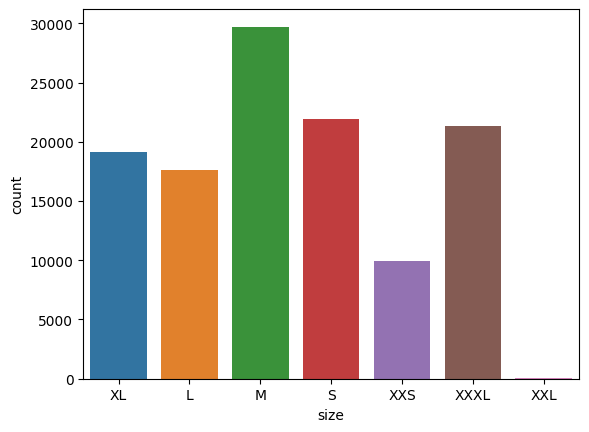

In [4]:
sns.countplot(x=df_raw['size'])

In [5]:
#removing outliers
dfs = []
sizes = []
for size_type in df_raw['size'].unique():
    sizes.append(size_type)
    ndf = df_raw[['age','height','weight']][df_raw['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)
    
for i in range(len(dfs)):
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]
df_raw = pd.concat(dfs)
df_raw.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [6]:
df_raw.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [7]:
#Filling missing data
df_raw["age"] = df_raw["age"].fillna(df_raw['age'].median())
df_raw["height"] = df_raw["height"].fillna(df_raw['height'].median())
df_raw["weight"] = df_raw["weight"].fillna(df_raw['weight'].median())

In [8]:
df_raw['size'] = df_raw['size'].map({"XXS": 1,
                                    "S": 2,
                                    "M": 3,
                                    "L": 4,
                                    "XL": 5,
                                    "XXL": 6,
                                    "XXXL": 7})

In [9]:
df_raw.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

In [10]:
df_raw

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,5
24,-0.713290,1.539527,1.556338,5
25,-0.353183,-1.161765,-0.291241,5
28,-0.473219,-1.933562,-1.399788,5
34,0.126960,-0.775866,0.447791,5
...,...,...,...,...
112707,-1.236027,-1.489537,0.318135,6
114732,-0.633300,-0.052082,1.494100,6
114803,-0.432391,-0.052082,0.514129,6
114994,0.973972,-0.052082,-0.465841,6


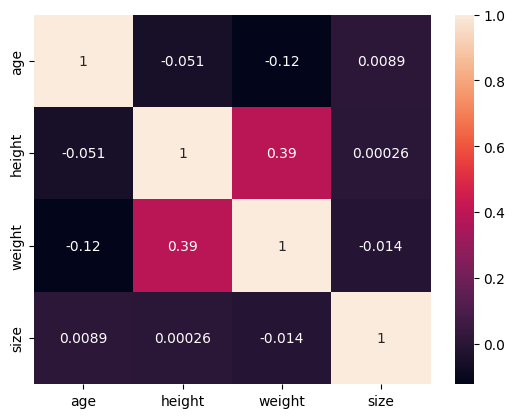

In [11]:
corr = sns.heatmap(df_raw.corr(), annot=True)

In [12]:
#features
X = df_raw.drop('size', axis=1)

#target
y = df_raw["size"]

In [13]:
#splitting data into training set and validation set
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.10)

In [14]:
len(X_train), len(X_test)

(107760, 11974)

In [22]:
df_raw.drop(df_raw[(df_raw['size'] == 'XXS') | (df_raw['size'] == 'XXL')].index, inplace=True)
df_raw["size"].value_counts()

size
3    29712
2    21924
7    21359
5    19119
4    17587
1     9964
6       69
Name: count, dtype: int64

In [27]:
#MLP sebelum
from sklearn.neural_network import MLPClassifier

# Membuat objek MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Melatih model
mlp.fit(X_train, y_train)

# Memprediksi nilai target
y_pred = mlp.predict(X_test)

# Akurasi
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 73.38%
              precision    recall  f1-score   support

           1       0.72      0.49      0.58      1981
           2       0.74      0.73      0.73      4443
           3       0.77      0.77      0.77      5819
           4       0.67      0.78      0.72      3603
           5       0.84      0.73      0.78      3818
           6       0.00      0.00      0.00        12
           7       0.67      0.77      0.71      4271

    accuracy                           0.73     23947
   macro avg       0.63      0.61      0.62     23947
weighted avg       0.74      0.73      0.73     23947

[[ 969  313  105  297   92    0  205]
 [ 117 3237  415  459   13    0  202]
 [  25  226 4476  254  149    0  689]
 [ 129  243  190 2806   85    0  150]
 [  56  104  276  197 2802    0  383]
 [   0    1    5    0    3    0    3]
 [  43  245  346  160  194    0 3283]]


In [23]:
df_raw['bmi'] = df_raw['height']/df_raw['weight']
df_raw['weight-squared'] = df_raw['weight'] * df_raw['weight']

In [24]:
#MLP sesudah
from sklearn.neural_network import MLPClassifier

# Membuat objek MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Melatih model
mlp.fit(X_train, y_train)

# Memprediksi nilai target
y_pred = mlp.predict(X_test)

# Akurasi
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 79.72%
              precision    recall  f1-score   support

           1       0.76      0.61      0.67      1039
           2       0.75      0.85      0.79      2153
           3       0.85      0.86      0.86      3049
           4       0.82      0.80      0.81      1697
           5       0.81      0.79      0.80      1914
           6       0.00      0.00      0.00         6
           7       0.77      0.75      0.76      2116

    accuracy                           0.80     11974
   macro avg       0.68      0.67      0.67     11974
weighted avg       0.80      0.80      0.80     11974

[[ 629   72   26  128   74    0  110]
 [   8 1829  156   98   27    0   35]
 [  44  189 2635    6   45    0  130]
 [  75  127   46 1352   46    0   51]
 [  42   90  127    2 1504    0  149]
 [   0    1    0    0    0    0    5]
 [  35  147  120   66  151    0 1597]]


In [1]:
from sklearn.neural_network import MLPClassifier

# Misalkan Anda memiliki data X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Inisialisasi model MLP Classifier
mlp_model = MLPClassifier()

# Melakukan cross validation pada model MLP Classifier
mlp_scores = cross_val_score(mlp_model, X_train, y_train, cv=10)

# Menampilkan hasil cross validation untuk masing-masing model
print("Hasil Cross Validation Model MLP Classifier: {:.2f}%".format(mlp_scores.mean() * 100))


KeyboardInterrupt

